In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
diamonds = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/Diamonds Prices2022.csv')

diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/4057266710.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


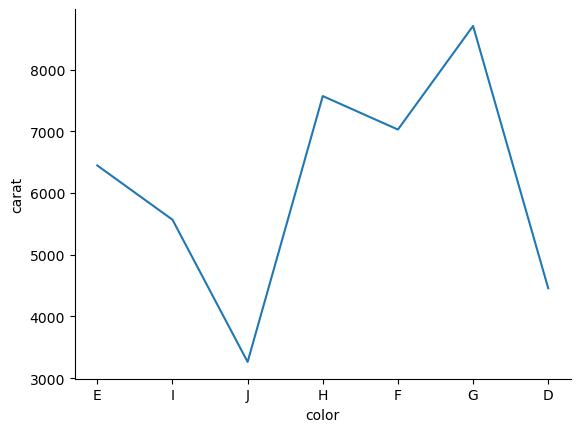

In [40]:
sns.lineplot(
    data=diamonds,
    x="color",
    y="carat",
    estimator = sum,
    ci=None
    #errorbar=None
)

sns.despine()

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/287082344.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


<Axes: xlabel='clarity', ylabel='carat'>

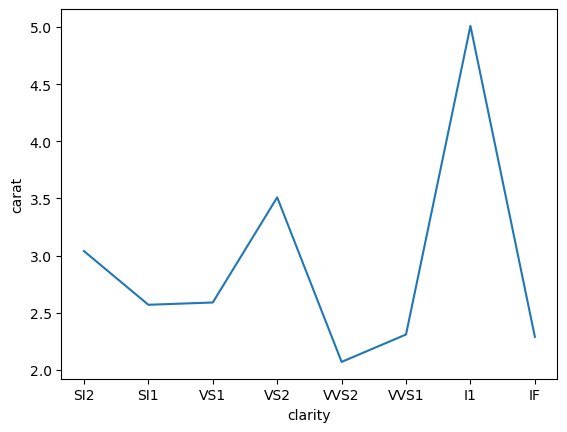

In [68]:
sns.lineplot(
    data=diamonds,
    x="clarity",
    y="carat",
    estimator="max",
    ci=None
)

In [70]:
housing_raw = pd.read_csv(
    '/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price")
                    .loc[:,
                         ["San Francisco", 
                          "Los Angeles", 
                          "San Diego", 
                          "Tulare"]
                        ]
                    .assign(overall_avg = lambda x: x.mean(axis=1))
                   )

ca_housing_pivot.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare,overall_avg
period_begin,,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8,671136.575
2017-01-09,1233393.7,614061.0,621737.5,227729.1,674230.325
2017-01-16,1239977.0,617311.0,625820.8,229060.4,678042.300
2017-01-23,1247977.0,620644.3,629491.6,229806.2,681979.775
2017-01-30,1253310.4,624541.6,632824.0,230139.5,685203.875


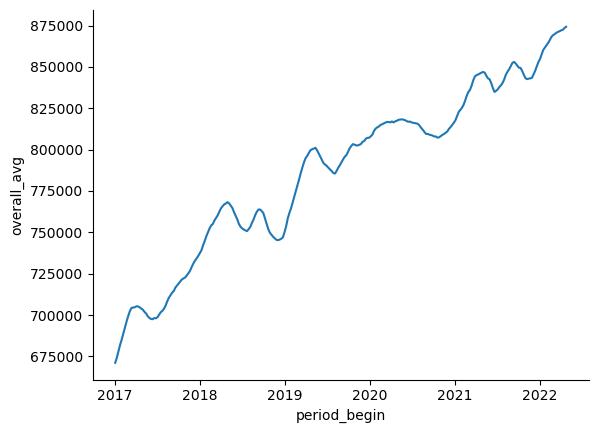

In [78]:
sns.lineplot(
    data=ca_housing_pivot,
    x=ca_housing_pivot.index,
    y=ca_housing_pivot["overall_avg"],
    #ci=None
)

sns.despine()

In [116]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/3846924581.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


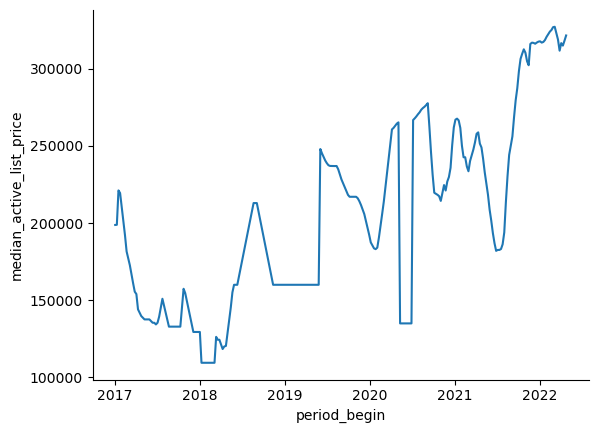

In [90]:
sns.lineplot(
    data=ca_housing,
    x="period_begin",
    y="median_active_list_price",
    estimator=min,
    ci=None
)
sns.despine()

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/1212552280.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


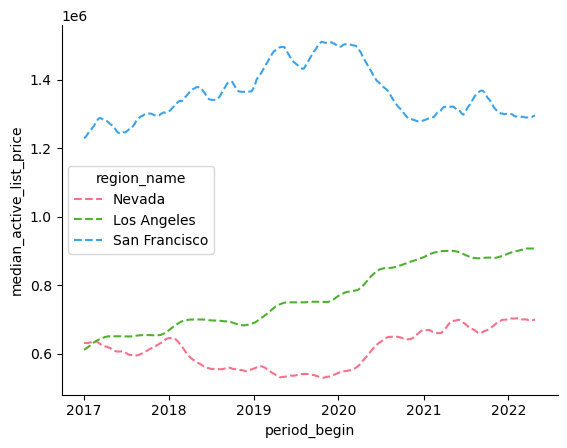

In [106]:
sns.lineplot(
    data=ca_housing.query("region_name in ['San Francisco','Los Angeles','Nevada']"),
    x="period_begin",
    y="median_active_list_price",
    #estimator=min,
    ci=None,
    ls ="--",
    hue="region_name",
    palette = "husl"
)
sns.despine()

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/3825834629.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


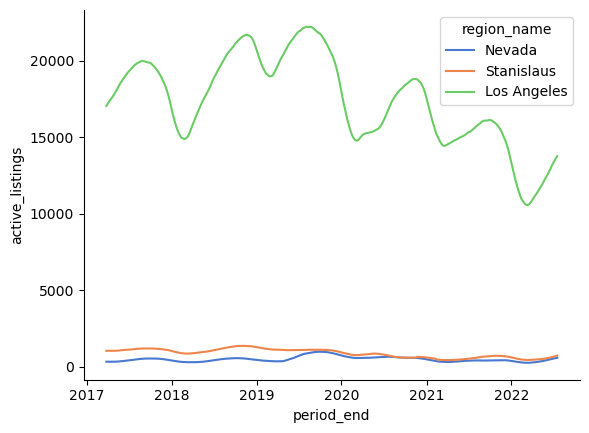

In [138]:
sns.lineplot(
    data=ca_housing.query("region_name in ['Los Angeles','Nevada','Stanislaus']"),
    x=ca_housing["period_end"],
    y=ca_housing["active_listings"],
    ci=None,
    estimator=sum,
    hue="region_name",
    palette="muted"
)
sns.despine()

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_5695/1098805302.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


<Axes: xlabel='period_end', ylabel='total_homes_sold'>

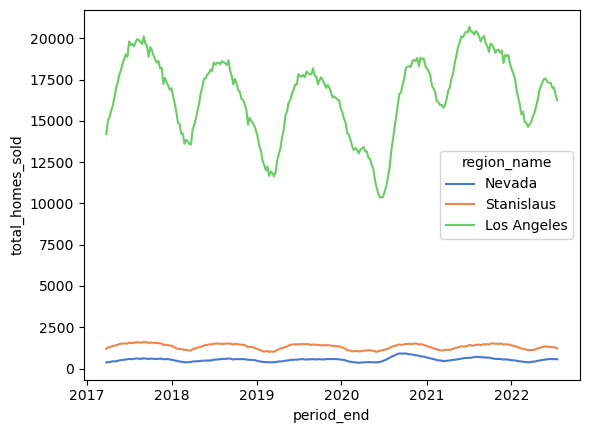

In [148]:
sns.lineplot(
    data=ca_housing.query("region_name in ['Los Angeles','Nevada','Stanislaus']"),
    x=ca_housing["period_end"],
    y=ca_housing["total_homes_sold"],
    ci=None,
    hue="region_name",
    palette="muted"
)